In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [28]:
from tensorflow.keras import models,layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
import numpy as np

In [4]:
(train_data , train_label) , (test_data , test_label) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [5]:
print("Shape of train_data : ",train_data.shape)
print("Shape of test_data : ",test_data.shape)

Shape of train_data :  (404, 13)
Shape of test_data :  (102, 13)


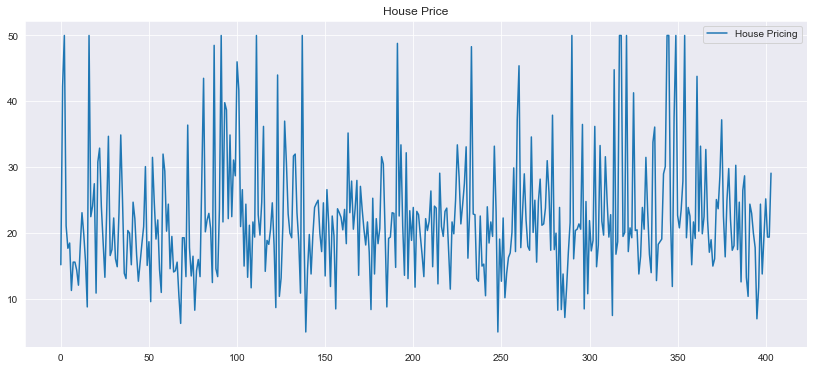

[]

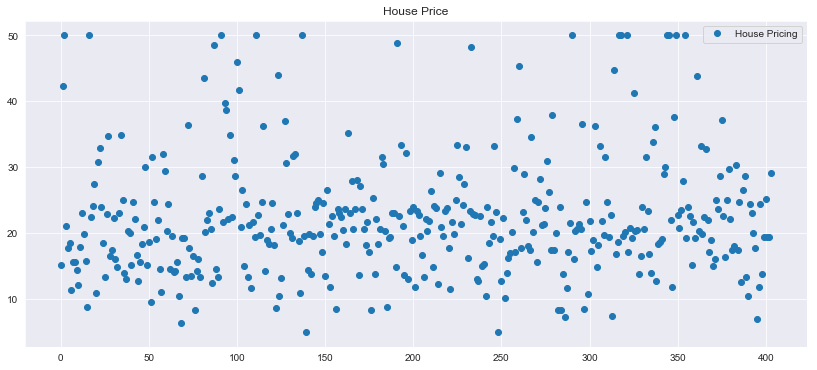

In [15]:
plt.figure(figsize=(14,6))
plt.plot(list(range(len(train_label))) , train_label,label="House Pricing")
plt.title("House Price")
plt.legend()
plt.show()
plt.figure(figsize=(14,6))
plt.plot(list(range(len(train_label))) , train_label , 'o',label="House Pricing")
plt.title("House Price")
plt.legend()
plt.plot()

In [21]:
mean = train_data.mean(axis = 0)
train_data -= mean
std  = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [25]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_label[:i * num_val_samples],
    train_label[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2


# Numpy concatination for K-folds

In [4]:
a = np.zeros((4,3))
b = np.ones((4,3))

In [20]:
a = np.ones((50))

In [25]:
np.concatenate((a[:10] , a[20:])).shape

(40,)

In [5]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
b

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [7]:
c = np.concatenate((a,b) , axis = 1)
c

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [8]:
a[1:3]

array([[0., 0., 0.],
       [0., 0., 0.]])

In [9]:
a[:,2:5]

array([[0.],
       [0.],
       [0.],
       [0.]])

In [10]:
from sklearn.datasets import load_boston
data = load_boston()

In [11]:
X = data.data
y = data.target

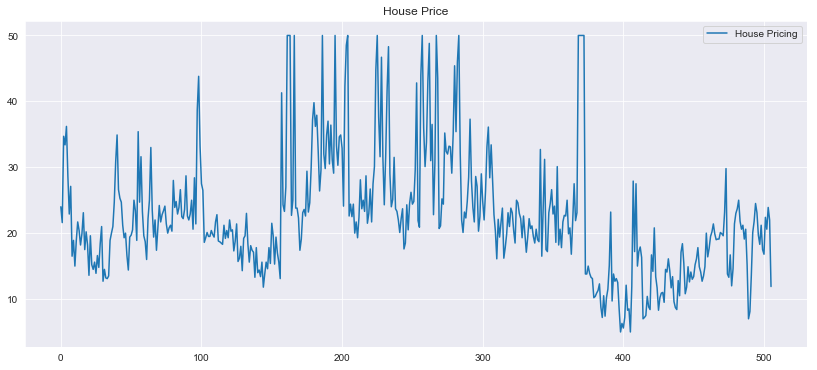

[]

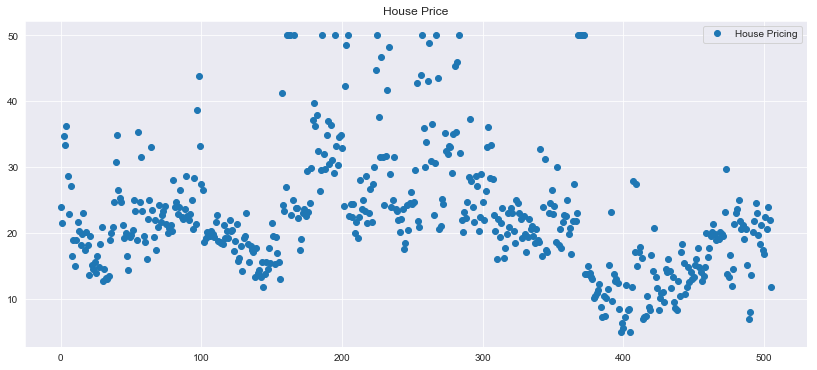

In [12]:
plt.figure(figsize=(14,6))
plt.plot(list(range(len(y))) , y,label="House Pricing")
plt.title("House Price")
plt.legend()
plt.show()
plt.figure(figsize=(14,6))
plt.plot(list(range(len(y))) , y , 'o',label="House Pricing")
plt.title("House Price")
plt.legend()
plt.plot()

In [13]:
print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

Shape of X :  (506, 13)
Shape of y :  (506,)


In [14]:
X_train = X[:400,:]
X_test  = X[400:,:]
y_train = y[:400]
y_test  = y[400:]

In [45]:
mean = X_train.mean(axis = 0)
X_train -= mean
std = X_train.std(axis = 0)
X_train /= std

X_test -= mean
X_test /= std

In [46]:
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (400, 13)
Shape of y_train :  (400,)
Shape of X_test :  (106, 13)
Shape of y_test :  (106,)


In [47]:
#Set total no of folds 
k = 4

In [68]:
def model():
    model1 = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[13]),
        tf.keras.layers.Dense(64,activation = "relu"),
        tf.keras.layers.Dense(64,activation = "relu"),
        tf.keras.layers.Dense(1 , activation = "relu")
    ])
    model1.compile(optimizer = "rmsprop" , loss = "mse" , metrics = ['mae'])
    return model1

In [75]:
logs = {}
for i in range(4):
    X_tr = np.concatenate((X_train[:i*100 , :] , X_train[(i+1) * 100 : , :]) , axis = 0)
    Y_tr = np.concatenate((y_train[:i*100] , y_train[(i+1)*100 :]))
    X_te = X_train[(i*100) : (i+1)*100 , :]
    Y_te = y_train[(i*100) : (i+1)*100 ]
    print("Traing for %d-folds...."%(i+1))
    num_epochs = 500
    ml_model   = model()
    his        = ml_model.fit(X_tr, Y_tr , epochs = num_epochs ,verbose = 0 , validation_data = (X_te , Y_te))
    logs['kfolds'+str(i)]            = dict()
    logs['kfolds'+str(i)]['history'] = his
    logs['kfolds'+str(i)]['model']   = ml_model
    logs['kfolds'+str(i)]['epochs']  = num_epochs

Traing for 1-folds....
Traing for 2-folds....
Traing for 3-folds....
Traing for 4-folds....


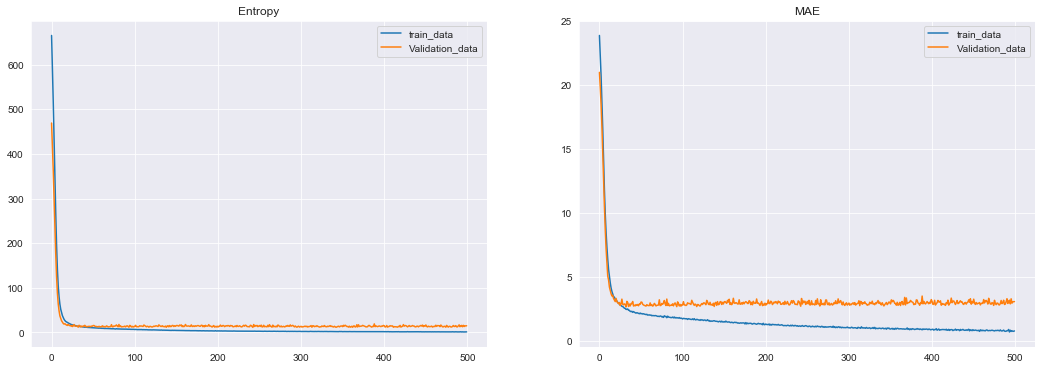

In [84]:
_ , ax = plt.subplots(1,2,figsize = (18,6))

ax[0].plot(logs['kfolds0']['history'].history['loss'] , label = "train_data")
ax[0].plot(logs['kfolds0']['history'].history['val_loss'] , label = "Validation_data")
ax[0].set_title("Entropy")
ax[0].legend()

ax[1].plot(logs['kfolds0']['history'].history['mae'] , label = "train_data")
ax[1].plot(logs['kfolds0']['history'].history['val_mae'] , label = "Validation_data")
ax[1].set_title("MAE")
ax[1].legend()

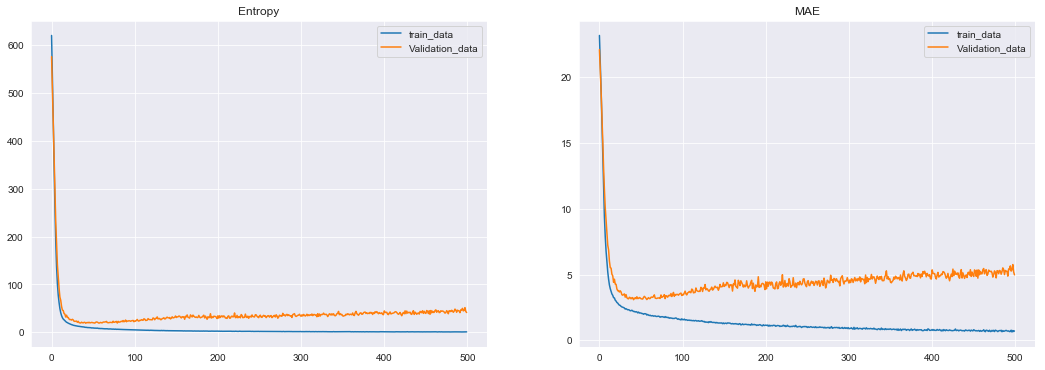

In [85]:
_ , ax = plt.subplots(1,2,figsize = (18,6))

ax[0].plot(logs['kfolds1']['history'].history['loss'] , label = "train_data")
ax[0].plot(logs['kfolds1']['history'].history['val_loss'] , label = "Validation_data")
ax[0].set_title("Entropy")
ax[0].legend()

ax[1].plot(logs['kfolds1']['history'].history['mae'] , label = "train_data")
ax[1].plot(logs['kfolds1']['history'].history['val_mae'] , label = "Validation_data")
ax[1].set_title("MAE")
ax[1].legend()

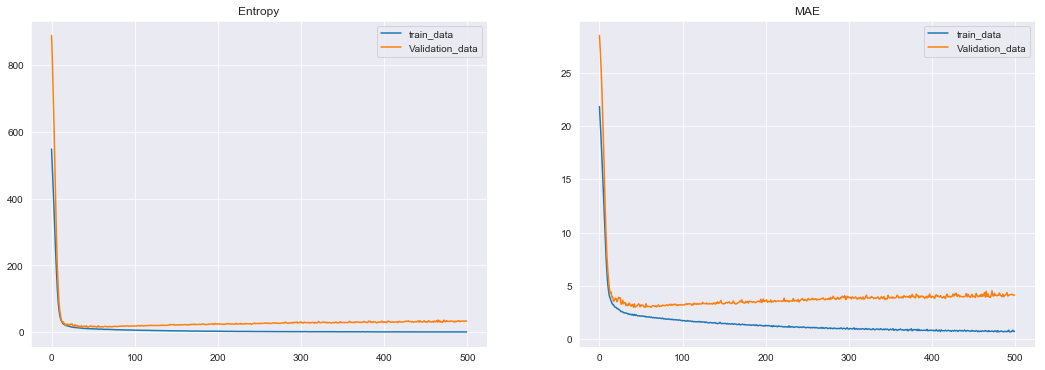

In [86]:
_ , ax = plt.subplots(1,2,figsize = (18,6))

ax[0].plot(logs['kfolds2']['history'].history['loss'] , label = "train_data")
ax[0].plot(logs['kfolds2']['history'].history['val_loss'] , label = "Validation_data")
ax[0].set_title("Entropy")
ax[0].legend()

ax[1].plot(logs['kfolds2']['history'].history['mae'] , label = "train_data")
ax[1].plot(logs['kfolds2']['history'].history['val_mae'] , label = "Validation_data")
ax[1].set_title("MAE")
ax[1].legend()

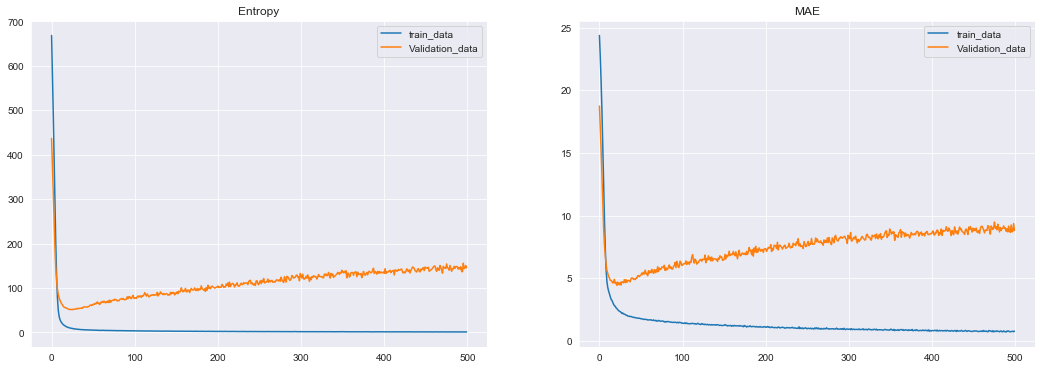

In [87]:
_ , ax = plt.subplots(1,2,figsize = (18,6))

ax[0].plot(logs['kfolds3']['history'].history['loss'] , label = "train_data")
ax[0].plot(logs['kfolds3']['history'].history['val_loss'] , label = "Validation_data")
ax[0].set_title("Entropy")
ax[0].legend()

ax[1].plot(logs['kfolds3']['history'].history['mae'] , label = "train_data")
ax[1].plot(logs['kfolds3']['history'].history['val_mae'] , label = "Validation_data")
ax[1].set_title("MAE")
ax[1].legend()

In [92]:
loss = []
for i in range(4):
    loss.append(logs['kfolds' + str(i)]['model'].evaluate(X_test,y_test)[1])

106/106 [==============================] - 0s 92us/sample - loss: 273.3086 - mae: 15.2512


In [93]:
loss

[6.5474415, 11.248435, 7.2719584, 15.251248]